# Regresión lineal usando Scikit Learn

In [2]:
import sqlite3 #formato de la BBDD
import pandas as pd 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split #para generar el set de datos y de pruebas
from sklearn.metrics import mean_squared_error

from math import sqrt
from sklearn import preprocessing #preprocesado de datos

import matplotlib.pyplot as plt
import seaborn as sns #gráficas más complejas
from sklearn.metrics import accuracy_score #estadísticas del sistema de machine learning
import numpy as np

In [3]:
#se crea una conexión con la BBDD y se lee una tabla (como dataframe)
conexionBBDD = sqlite3.connect('database.sqlite') 
df = pd.read_sql_query("SELECT * FROM Player_Attributes", conexionBBDD)
df.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [4]:
df.columns #se ven todas las columnas de la tabla para elegir las necesarias para alimentar el sistema. Estas son las "features" (x) para calcular la función f(x) o "target" (y)

features = [
    'potential', 'crossing', 'finishing', 'heading_accuracy',
    'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
    'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
    'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
    'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
    'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
    'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
    'gk_reflexes']
target = ['overall_rating']

In [5]:
df = df.dropna() #se eliminan los datos NaN

#se separan las features en x y el target en y
x = df[features]
y = df[target]

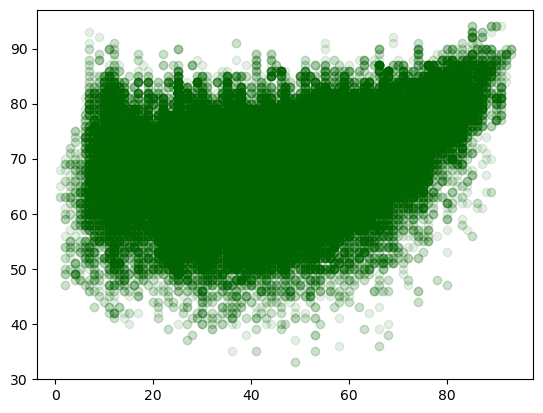

In [6]:
#se coge una de las columnas como ejemplo y se representa un gráfico de dispersión para ver a simple vista si influye para calcular la f(x) (si existe una estrecha relación)
plt.scatter(x['volleys'],y,color='darkgreen',label="Data", alpha=.1)
#en este caso no es útil, no es nada precisa

## Creación de datasets (training y test) 

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=324) #33% de datos de test, en este caso no se aporta cierto grado de aleatoriedad

#se utiliza un escalador estándar, se deja un dataset uniforme
scale = preprocessing.StandardScaler().fit(x_train) 

x_train = scale.transform(x_train)
x_test = scale.transform(x_test)

In [8]:
#se ajusta el modelo de machine learning a los datos de entrenamiento
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [9]:
#se predice utilizando el modelo creado
y_prediction = reg.predict(x_test)
y_prediction.shape

(59517, 1)

In [10]:
#se calcula el MSE y el RMSE entre la salida del entrenamiento y la del test (predicción)
MSE = mean_squared_error(y_true = y_test, y_pred = y_prediction)
RMSE = sqrt(MSE)
precision  = reg.score(x_test, y_test) #precisión del modelo

print("MSE: ", MSE, ", RMSE: ", RMSE, ", precisión del modelo: ", precision)

MSE:  7.869725184695124 , RMSE:  2.80530304685521 , precisión del modelo:  0.8412690897596595


In [11]:
reg.coef_ #se obtiene la matriz W de coeficientes -> y = w1x1 + w2x2 ... + b

array([[ 2.48175418,  0.37435166,  0.2155902 ,  1.14537904,  0.72579619,
         0.08835762, -0.2396529 ,  0.20341906,  0.23070925,  0.08573083,
         2.03147644,  0.08063536,  0.11593773, -0.09744622,  1.92780373,
         0.10753058,  0.27833167,  0.16277628, -0.08089224,  0.73874625,
        -0.25048481,  0.33897633,  0.22293067, -0.18511046, -0.01892236,
         0.21517621,  0.70526674,  0.07880386, -0.61339243,  2.72376613,
         0.51832172, -0.70907673,  0.91420565,  0.43578429]])